In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itables
from matplotlib.pyplot import title

from main_graph import BaseGraph
itables.init_notebook_mode()

In [2]:
main_df = BaseGraph()
df_install_main,df_install_s_2 = main_df.get_main_df()

In [3]:
df_install_s_2['install_date'].value_counts()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [4]:
df_install_s_2.groupby(['install_date'])['installs'].sum().reset_index()['installs'].sum()

np.float64(58222.0)

In [5]:
#Подготовка данных , объединение источников


df_source_2_main = df_install_main[df_install_main['source']=='Source 2'].groupby(['install_date'])['source'].agg(['count']).reset_index()
df_source_2_main.rename(columns={'count':'installs_main'}, inplace=True)
df_install_s_2=df_install_s_2.groupby(['install_date'])['installs'].sum().reset_index()
df_compare=df_install_s_2.merge(df_source_2_main, on=['install_date'], how='left')

In [6]:
#Краткая статистика
df_compare.describe()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [8]:
#Группировка по году
df_compare['install_year']=pd.to_datetime(df_compare['install_date']).dt.year

grup_df=df_compare.groupby('install_year')[['installs', 'installs_main']].sum().reset_index()
grup_df['diff']=grup_df['installs']-grup_df['installs_main']
grup_df

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [9]:
#График соотношения установок из двух источников

graph = BaseGraph()
graph.get_compare_s_2_main_gap(df_compare)

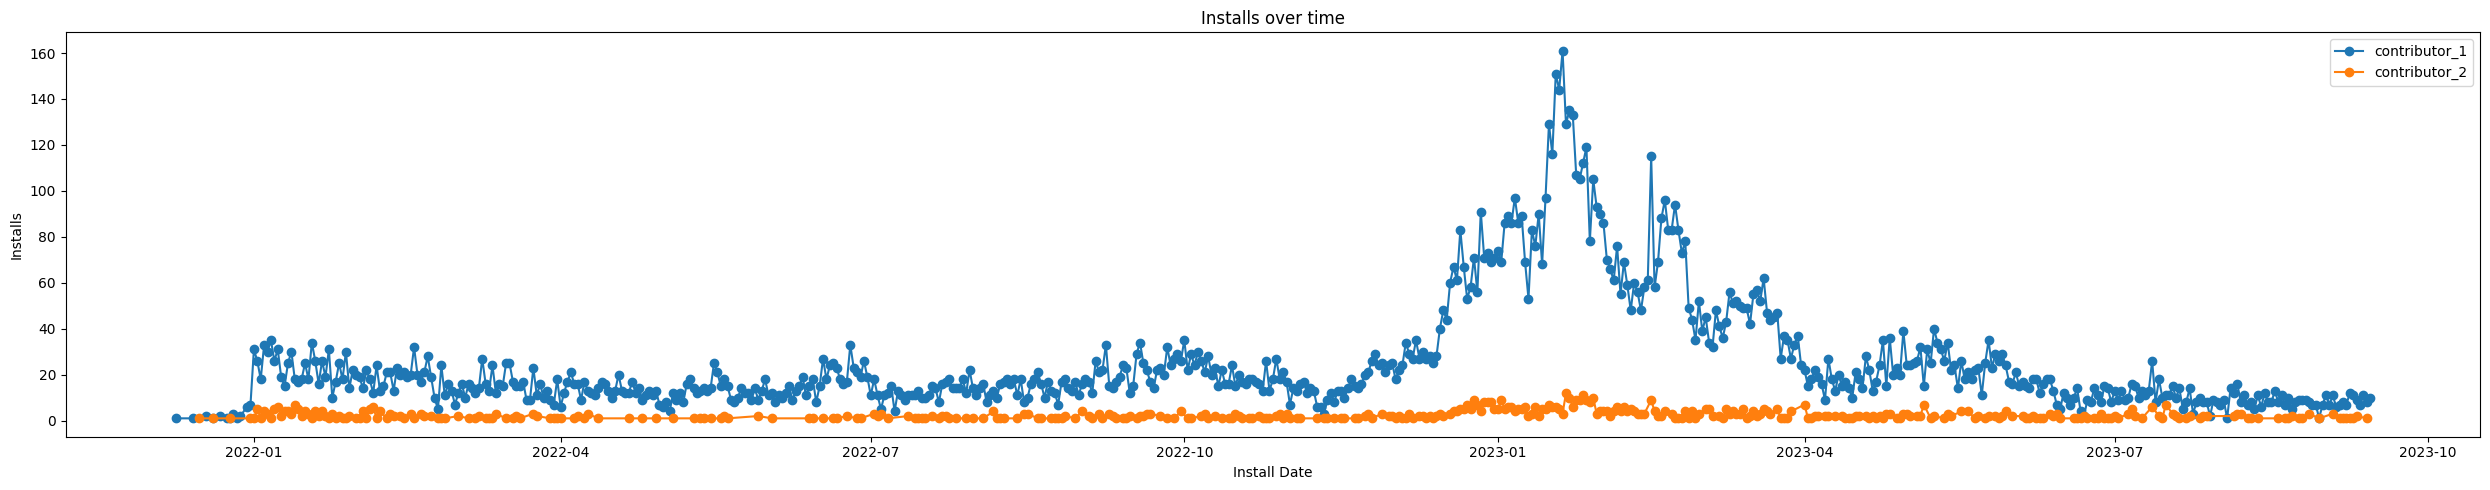

In [10]:
#Предположение о том что Source 2 есть в contributor 1 и contributor 2
df_sor_2_cont_1=df_install_main[df_install_main['contributor_1']=='Source 2']
df_sor_2_cont_1=df_sor_2_cont_1.groupby(['contributor_1_date'])['contributor_1'].agg(['count']).reset_index().rename(columns={'count':'contributor_1'})

df_sor_2_cont_2=df_install_main[df_install_main['contributor_2']=='Source 2']
df_sor_2_cont_2=df_sor_2_cont_2.groupby(['contributor_2_date'])['contributor_2'].agg(['count']).reset_index().rename(columns={'count':'contributor_2'})

graph = BaseGraph()
graph.get_compar_contributor(df_sor_2_cont_1,df_sor_2_cont_2)

In [11]:
df_compare=df_compare.merge(df_sor_2_cont_1, left_on='install_date',right_on='contributor_1_date', how='left')
df_compare['installs_main_pl_comt_1']= df_compare['installs_main']+df_compare['contributor_1']
df_compare

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [12]:
df_compare.groupby('install_year')[['installs','installs_main', 'installs_main_pl_comt_1']].sum().reset_index()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [13]:
#Добавить contributor 1 и contributor 2 к installs_s2 и installs_main


graph = BaseGraph()
graph.get_resurce_all(df_sor_2_cont_1,df_sor_2_cont_2,df_compare)



In [14]:
df_compare

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [15]:
#Heat map

graph = BaseGraph()
graph.get_heat_map(df_compare)


C:\Users\Yaroslav\AppData\Local\Temp\2\ipykernel_17924\1432231252.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



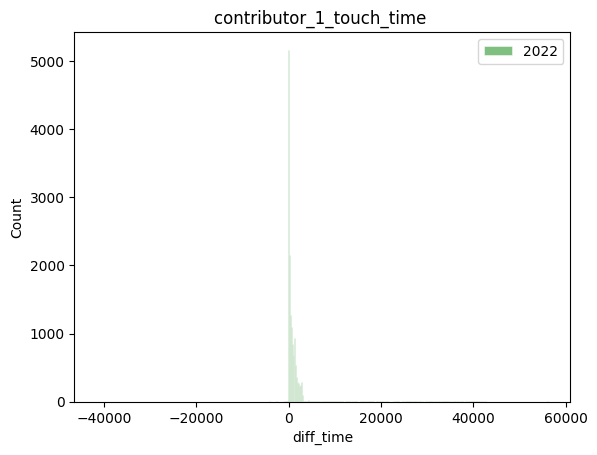

In [16]:
df_contr_1=df_install_main[df_install_main['contributor_1']=='Source 2']
df_contr_1['dif_time']=((df_contr_1["install_time"] - df_contr_1["contributor_1_touch_time"]
).dt.total_seconds() / 60)

#df_contr_1[df_contr_1['dif_time']<=0]
fig, ax = plt.subplots()
ax.hist(df_contr_1['dif_time'],
            bins=500,
            linewidth=0.7,
            edgecolor="white",
            alpha=0.5,
            color='green',
            label='2022'
        )
ax.set_xlabel('diff_time')
ax.set_ylabel('Count')
ax.set_title('contributor_1_touch_time ')

ax.legend()  # ← легенда здесь!
plt.show()


In [17]:
df_contr_1['dif_time'].describe()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [18]:
df_install_main[df_install_main['contributor_1']=='Source 2']

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [19]:
df_install_main

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [21]:
#Для Power BI
# df_compare=df_compare.merge(df_sor_2_cont_2, left_on='install_date',right_on='contributor_2_date', how='left')
# df_compare.to_excel('df_compare_power_bi.xlsx',index=False)
#
#
# df_power_bi=df_install_main.groupby(['install_date','source','contributor_1','contributor_2'])['Unnamed: 0'].count().reset_index().rename(columns={'Unnamed: 0':'count_install'})
# df_power_bi['combine'] = df_power_bi['source']+'_'+df_power_bi['contributor_1']+'_'+df_power_bi['contributor_2']
# df_power_bi.to_excel('df_power_bi.xlsx',index=False)